# Lab 7. Plotting

## Data visualization is as much a part of the data processing step as the data presentation step. It is much easier to compare values when they are plotted than numeric values. By visualizing data we are able to get a better intuitive sense of the data than would be possible by looking at tables of values alone. Additionally, visualizations can bring to light hidden patterns in data, that you, the analyst, can exploit for model selection.

## This session will cover:
1. Different types of plots (distribution plot, bar plot, scatter plot, density plot,..)
2. Pair plots (put different plots in a single figure)
3. Plot different variables together (multi-variable plotting using 'facet')

# 0. Let's load and install some libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

# 1. Let's load some data

In [4]:
# tips is a dataset included in the seaborn library
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


# 2. Let's do some plotting (univariate, bivariate)

## 2.1. Histograms

In [7]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

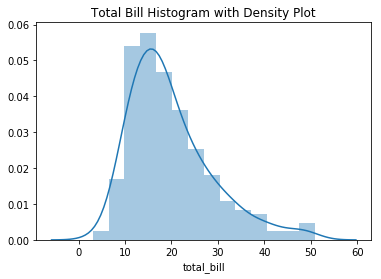

In [8]:
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot');

## The histogram reveals that 20 dollars is the usual total_bill (mean 19.78)

## 2.2. Bar Plots

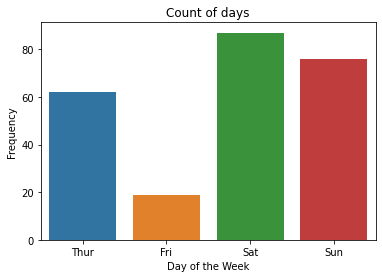

In [8]:
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days');
ax.set_xlabel('Day of the Week');
ax.set_ylabel('Frequency');

## we observe from the previous figure that people tend to dine outside mostly on weekends

## 2.3. ScatterPlot

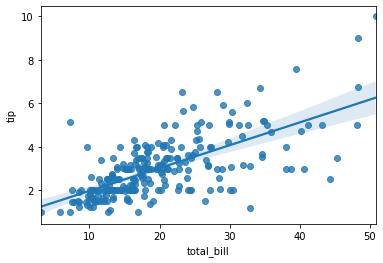

In [9]:
x = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip');
ax.set_xlabel('Total Bill');
ax.set_ylabel('Tip');

## we observe some relationship between the total amount paid and the tip received, but also increasing variability

## 2.4. Density Plot

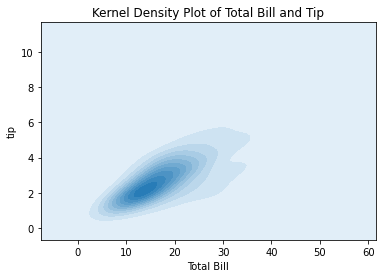

In [10]:
ax = sns.kdeplot(data=tips['total_bill'],data2=tips['tip'],shade=True) # shade will fill in the contours
ax.set_title('Kernel Density Plot of Total Bill and Tip');
ax.set_xlabel('Total Bill');

## 2.5. Box Plot

Text(0, 0.5, 'Total Bill')

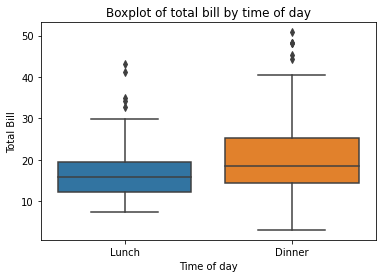

In [11]:
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

## dinners seem to be more profitable

## 2.6. Violin Plot

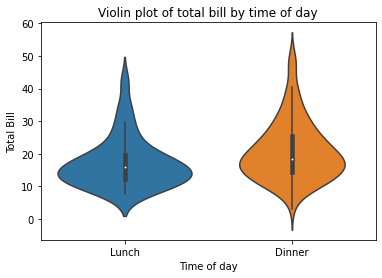

In [12]:
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day');
ax.set_xlabel('Time of day');
ax.set_ylabel('Total Bill');

## 2.6. Pair Plot

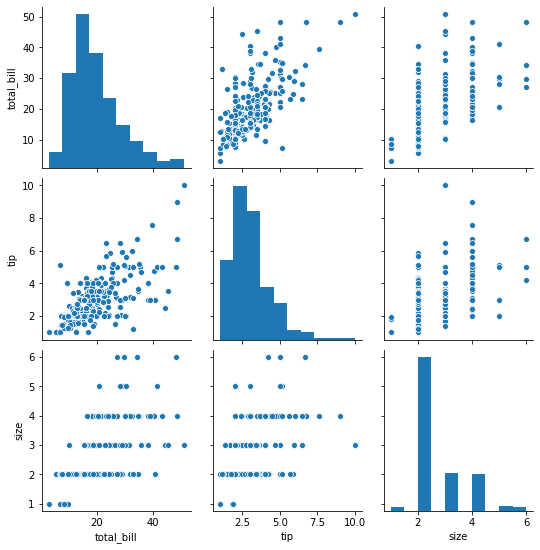

In [13]:
fig = sns.pairplot(tips)

## 2.7. Pair Plot (fancy)

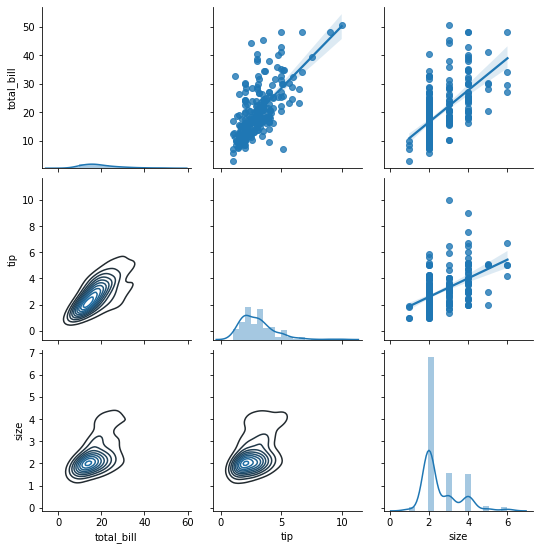

In [14]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=False)
plt.show()

# 3. Multivariate plotting

## multivariate plotting is hard and there is no best practice on how to do it, it really depends on the purpose of the visualization

## 3.1. Violin Plots

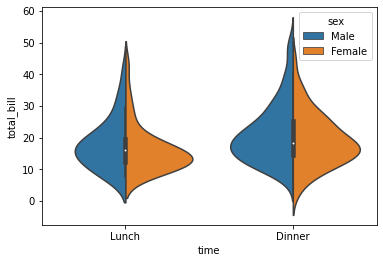

In [15]:
ax = sns.violinplot(x='time', y='total_bill',hue='sex', data=tips,split=True)

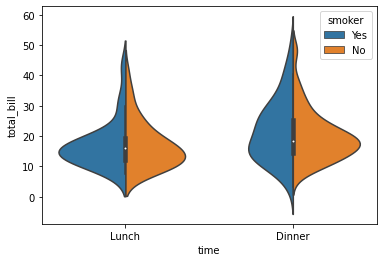

In [16]:
ax = sns.violinplot(x='time', y='total_bill',hue='smoker', data=tips,split=True)

## 3.2. Pair Plots

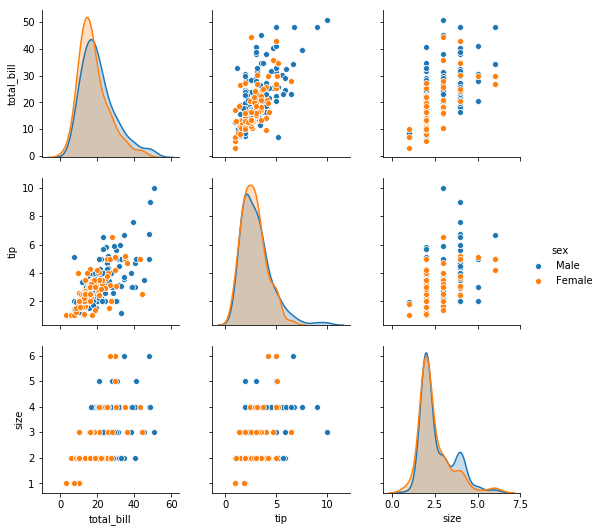

In [11]:
fig = sns.pairplot(tips, hue='sex')

## 3.3. Facet Plots

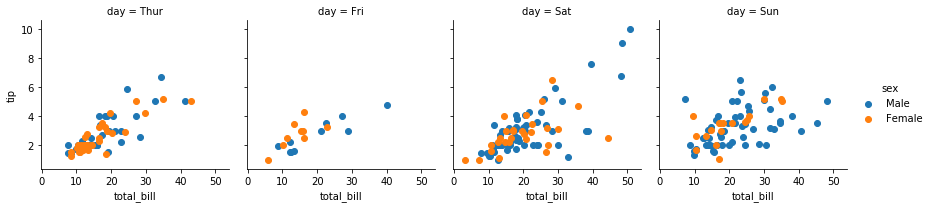

In [12]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()


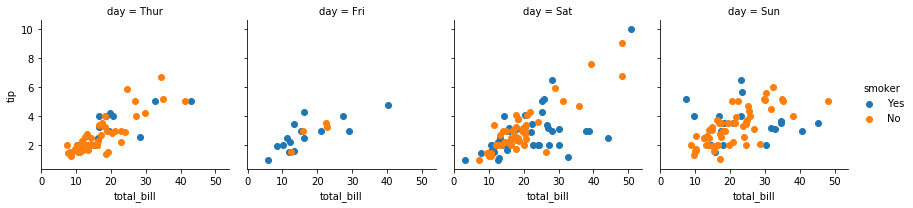

In [13]:
facet = sns.FacetGrid(tips, col='day', hue='smoker')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

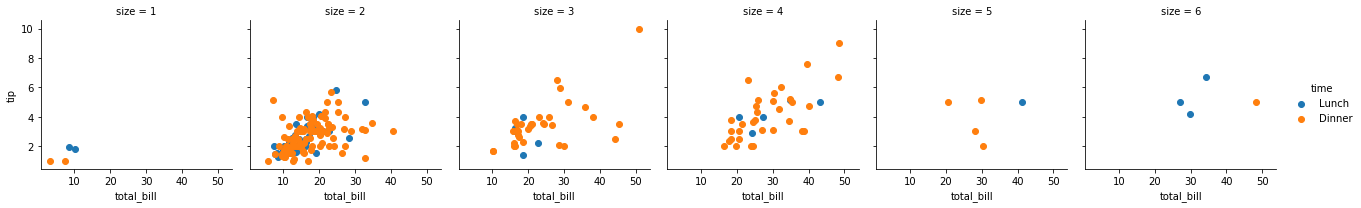

In [14]:
facet = sns.FacetGrid(tips, col='size', hue='time')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()